In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import preprocessing

In [2]:
!pip install joblib

In [3]:
import joblib

In [4]:
df = pd.read_csv('Wrangled.csv')

C:\Users\veron\AppData\Local\Temp\ipykernel_13772\2296681516.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Wrangled.csv')


In [5]:
df.head()

,Unnamed: 0,Rfrg_Prvdr_Geo_Lvl,Rfrg_Prvdr_Geo_Cd,Rfrg_Prvdr_Geo_Desc,BETOS_Lvl,BETOS_Cd,BETOS_Desc,HCPCS_Cd,HCPCS_Desc,Suplr_Rentl_Ind,Tot_Rfrg_Prvdrs,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Avg_Suplr_Sbmtd_Chrg,Avg_Suplr_Mdcr_Alowd_Amt,Avg_Suplr_Mdcr_Pymt_Amt,Avg_Suplr_Mdcr_Stdzd_Amt
0,0,National,6.0,National,Drugs and Nutritional Products,O1C,Enteral and parenteral,B4034,"Enteral feeding supply kit; syringe fed, per d...",N,28183,1745,33451.0,171371,4627387,58.266520,3.718512,2.918066,3.047039
1,1,National,6.0,National,Drugs and Nutritional Products,O1C,Enteral and parenteral,B4035,"Enteral feeding supply kit; pump fed, per day,...",N,27342,1758,39110.0,271836,7050743,75.495042,6.433860,5.067509,5.552222
2,2,National,6.0,National,Drugs and Nutritional Products,O1C,Enteral and parenteral,B4036,"Enteral feeding supply kit; gravity fed, per d...",N,6166,933,7171.0,41181,1116382,75.172639,5.036933,3.959289,4.100195
3,3,National,6.0,National,Drugs and Nutritional Products,O1C,Enteral and parenteral,B4081,Nasogastric tubing with stylet,N,14,12,13.0,20,33,113.736061,17.292727,13.833939,13.579697
4,4,National,6.0,National,Drugs and Nutritional Products,O1C,Enteral and parenteral,B4082,Nasogastric tubing without stylet,N,16,16,16.0,21,43,99.110930,12.532093,9.502326,9.463488


In [6]:
tot_rfrg_prvdrs_max = df['Tot_Rfrg_Prvdrs'].max()
df.loc[df['Tot_Rfrg_Prvdrs'] == tot_rfrg_prvdrs_max]

,Unnamed: 0,Rfrg_Prvdr_Geo_Lvl,Rfrg_Prvdr_Geo_Cd,Rfrg_Prvdr_Geo_Desc,BETOS_Lvl,BETOS_Cd,BETOS_Desc,HCPCS_Cd,HCPCS_Desc,Suplr_Rentl_Ind,Tot_Rfrg_Prvdrs,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Avg_Suplr_Sbmtd_Chrg,Avg_Suplr_Mdcr_Alowd_Amt,Avg_Suplr_Mdcr_Pymt_Amt,Avg_Suplr_Mdcr_Stdzd_Amt
592,592,National,6.0,National,Durable Medical Equipment,D1E,Other DME,A4253,Blood glucose test or reagent strips for home ...,N,233762,43511,1891407.0,5104070,13931820,61.932717,8.400779,5.964003,5.786099


In [7]:
blood_glucose_test = df[df.HCPCS_Cd == 'A4253']
blood_glucose_test.T

,592,1999,2624,3186,3987,4884,5882,6642,7284,7821,...,38072,38787,39428,39723,39856,40037,40109,40154,40206,40228
Unnamed: 0,592,1999,2624,3186,3987,4884,5882,6642,7284,7821,...,38072,38787,39428,39723,39856,40037,40109,40154,40206,40228
Rfrg_Prvdr_Geo_Lvl,National,State,State,State,State,State,State,State,State,State,...,State,State,State,State,State,State,State,State,State,State
Rfrg_Prvdr_Geo_Cd,6.0,1.0,2.0,4.0,5.0,6.0,8.0,9.0,10.0,11.0,...,54,55,56,66,72,78,9B,9C,9D,9E
Rfrg_Prvdr_Geo_Desc,National,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,West Virginia,Wisconsin,Wyoming,Guam,Puerto Rico,Virgin Islands,Armed Forces Europe,Armed Forces Pacific,Unknown,Foreign Country
BETOS_Lvl,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,...,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment
BETOS_Cd,D1E,D1E,D1E,D1E,D1E,D1E,D1E,D1E,D1E,D1E,...,D1E,D1E,D1E,D1E,D1E,D1E,D1E,D1E,D1E,D1E
BETOS_Desc,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME,...,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME
HCPCS_Cd,A4253,A4253,A4253,A4253,A4253,A4253,A4253,A4253,A4253,A4253,...,A4253,A4253,A4253,A4253,A4253,A4253,A4253,A4253,A4253,A4253
HCPCS_Desc,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...
Suplr_Rentl_Ind,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N


In [8]:
blood_glucose_test.shape

(59, 19)

In [9]:
others = df[df.HCPCS_Cd != 'A4253']
others.shape

(40208, 19)

In [10]:
dummy_df = pd.get_dummies(blood_glucose_test)

In [11]:
dummy_df.dtypes

Unnamed: 0                                                                                         int64
Tot_Rfrg_Prvdrs                                                                                    int64
Tot_Suplrs                                                                                         int64
Tot_Suplr_Benes                                                                                  float64
Tot_Suplr_Clms                                                                                     int64
                                                                                                  ...   
BETOS_Cd_D1E                                                                                       uint8
BETOS_Desc_Other DME                                                                               uint8
HCPCS_Cd_A4253                                                                                     uint8
HCPCS_Desc_Blood glucose test or reagent strips for hom

In [12]:
dummy_df.head()

,Unnamed: 0,Tot_Rfrg_Prvdrs,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Avg_Suplr_Sbmtd_Chrg,Avg_Suplr_Mdcr_Alowd_Amt,Avg_Suplr_Mdcr_Pymt_Amt,Avg_Suplr_Mdcr_Stdzd_Amt,...,Rfrg_Prvdr_Geo_Desc_Washington,Rfrg_Prvdr_Geo_Desc_West Virginia,Rfrg_Prvdr_Geo_Desc_Wisconsin,Rfrg_Prvdr_Geo_Desc_Wyoming,BETOS_Lvl_Durable Medical Equipment,BETOS_Cd_D1E,BETOS_Desc_Other DME,HCPCS_Cd_A4253,"HCPCS_Desc_Blood glucose test or reagent strips for home blood glucose monitor, per 50 strips",Suplr_Rentl_Ind_N
592,592,233762,43511,1891407.0,5104070,13931820,61.932717,8.400779,5.964003,5.786099,...,0,0,0,0,1,1,1,1,1,1
1999,1999,3093,1406,25059.0,64060,181067,56.558110,8.423689,6.055243,5.858798,...,0,0,0,0,1,1,1,1,1,1
2624,2624,509,204,2394.0,5877,16216,64.369821,8.403106,5.852651,5.676490,...,0,0,0,0,1,1,1,1,1,1
3186,3186,4387,2262,29371.0,70945,207369,66.860627,8.386908,6.101452,5.931097,...,0,0,0,0,1,1,1,1,1,1
3987,3987,2258,924,19444.0,51839,139633,49.084897,8.435714,6.028881,5.825964,...,0,0,0,0,1,1,1,1,1,1


In [13]:
X = dummy_df.drop(columns='Avg_Suplr_Sbmtd_Chrg')
y = dummy_df['Avg_Suplr_Sbmtd_Chrg']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, X_test.shape

((47, 134), (12, 134))

In [16]:
y_train.shape, y_test.shape

((47,), (12,))

In [17]:
X_train.head()

,Unnamed: 0,Tot_Rfrg_Prvdrs,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Avg_Suplr_Mdcr_Alowd_Amt,Avg_Suplr_Mdcr_Pymt_Amt,Avg_Suplr_Mdcr_Stdzd_Amt,Rfrg_Prvdr_Geo_Lvl_National,...,Rfrg_Prvdr_Geo_Desc_Washington,Rfrg_Prvdr_Geo_Desc_West Virginia,Rfrg_Prvdr_Geo_Desc_Wisconsin,Rfrg_Prvdr_Geo_Desc_Wyoming,BETOS_Lvl_Durable Medical Equipment,BETOS_Cd_D1E,BETOS_Desc_Other DME,HCPCS_Cd_A4253,"HCPCS_Desc_Blood glucose test or reagent strips for home blood glucose monitor, per 50 strips",Suplr_Rentl_Ind_N
28314,28314,8973,3846,77232.0,218435,560257,8.385775,5.948461,5.782229,0,...,0,0,0,0,1,1,1,1,1,1
24350,24350,6304,3170,62156.0,163140,446873,8.397616,6.000170,5.823271,0,...,0,0,0,0,1,1,1,1,1,1
7284,7284,821,543,10485.0,24463,76354,8.384700,5.920637,5.755039,0,...,0,0,0,0,1,1,1,1,1,1
13880,13880,2401,1015,23174.0,65794,162717,8.377859,5.937027,5.777270,0,...,0,0,0,0,1,1,1,1,1,1
5882,5882,3630,1746,17642.0,45470,128382,8.381079,5.904870,5.743645,0,...,0,0,0,0,1,1,1,1,1,1


In [18]:
X_train.dtypes

Unnamed: 0                                                                                         int64
Tot_Rfrg_Prvdrs                                                                                    int64
Tot_Suplrs                                                                                         int64
Tot_Suplr_Benes                                                                                  float64
Tot_Suplr_Clms                                                                                     int64
                                                                                                  ...   
BETOS_Cd_D1E                                                                                       uint8
BETOS_Desc_Other DME                                                                               uint8
HCPCS_Cd_A4253                                                                                     uint8
HCPCS_Desc_Blood glucose test or reagent strips for hom

In [19]:
X_test.dtypes

Unnamed: 0                                                                                         int64
Tot_Rfrg_Prvdrs                                                                                    int64
Tot_Suplrs                                                                                         int64
Tot_Suplr_Benes                                                                                  float64
Tot_Suplr_Clms                                                                                     int64
                                                                                                  ...   
BETOS_Cd_D1E                                                                                       uint8
BETOS_Desc_Other DME                                                                               uint8
HCPCS_Cd_A4253                                                                                     uint8
HCPCS_Desc_Blood glucose test or reagent strips for hom

In [20]:
train_mean = y_train.mean()
train_mean

61.51597250034043

In [21]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[61.5159725]])

In [22]:
def r_squared(y, ypred):
    ybar = np.sum(y) / len(y)
    sum_sq_tot = np.sum((y - ybar)**2)
    sum_sq_res = np.sum((y - ypred)**2)
    R2 = 1.0 - sum_sq_tot / sum_sq_res
    return R2

In [23]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([61.5159725, 61.5159725, 61.5159725, 61.5159725, 61.5159725])

In [24]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([61.5159725, 61.5159725, 61.5159725, 61.5159725, 61.5159725])

In [25]:
r_squared(y_train, y_tr_pred)

0.0

In [26]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

0.002650912416152229

In [27]:
def mae(y, ypred):
    abs_error = np.abs(y - ypred)
    mae = np.mean(abs_error)
    return mae

In [28]:
mae(y_train, y_tr_pred)

3.8805666297519243

In [29]:
mae(y_test, y_te_pred)

4.877790833193259

In [30]:
def mse(y, ypred):
    sq_error = (y - ypred)**2
    mse = np.mean(sq_error)
    return mse

In [31]:
mse(y_train, y_tr_pred)

25.163066629870684

In [32]:
mse(y_test, y_te_pred)

46.570512703413506

In [33]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([5.01628016, 6.82425913])

In [34]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.002657958431159013)

In [35]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(3.8805666297519243, 4.877790833193259)

In [36]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(25.163066629870684, 46.570512703413506)

In [37]:
r2_score(y_train, y_tr_pred), r2_score(y_tr_pred, y_train)

(0.0, -4.984058830771641e+29)

In [38]:
r2_score(y_test, y_te_pred), r2_score(y_te_pred, y_test)

(-0.002657958431159013, -9.224240372096643e+29)

In [39]:
r_squared(y_train, y_tr_pred), r_squared(y_tr_pred, y_train)

(0.0, 1.0)

In [40]:
r_squared(y_test, y_te_pred), r_squared(y_te_pred, y_test)

(0.002650912416152229, 1.0)

In [41]:
X_defaults_median = X_train.median()
X_defaults_median

Unnamed: 0                                                                                       23050.0
Tot_Rfrg_Prvdrs                                                                                   2900.0
Tot_Suplrs                                                                                        1313.0
Tot_Suplr_Benes                                                                                  22299.0
Tot_Suplr_Clms                                                                                   55874.0
                                                                                                  ...   
BETOS_Cd_D1E                                                                                         1.0
BETOS_Desc_Other DME                                                                                 1.0
HCPCS_Cd_A4253                                                                                       1.0
HCPCS_Desc_Blood glucose test or reagent strips for hom

In [42]:
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

In [43]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [44]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [45]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [46]:
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(1.0, -0.3042769865388033)

In [47]:
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(6.651889441158385e-15, 5.281020844913176)

In [48]:
median_mse = mean_squared_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mse

(7.73419372608175e-29, 5.281020844913176)

In [49]:
X_defaults_mean = X_train.mean()
X_defaults_mean

Unnamed: 0                                                                                       22819.765957
Tot_Rfrg_Prvdrs                                                                                   3920.255319
Tot_Suplrs                                                                                        1824.191489
Tot_Suplr_Benes                                                                                  32260.638298
Tot_Suplr_Clms                                                                                   85974.702128
                                                                                                     ...     
BETOS_Cd_D1E                                                                                         1.000000
BETOS_Desc_Other DME                                                                                 1.000000
HCPCS_Cd_A4253                                                                                       1.000000
HCPCS_Desc

In [50]:
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)

In [51]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [52]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [53]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [54]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(1.0, -0.3042769865388033)

In [55]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(6.651889441158385e-15, 5.281020844913176)

In [56]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(7.73419372608175e-29, 60.57982930232294)

In [57]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LinearRegression()
)

In [58]:
type(pipe)

sklearn.pipeline.Pipeline

In [59]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

In [60]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [61]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [62]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(1.0, -0.3042769865388033)

In [63]:
median_r2

(1.0, -0.3042769865388033)

In [64]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(6.651889441158385e-15, 5.281020844913176)

In [65]:
median_mae

(6.651889441158385e-15, 5.281020844913176)

In [66]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(7.73419372608175e-29, 60.57982930232294)

In [67]:
median_mse

(7.73419372608175e-29, 5.281020844913176)

In [68]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(score_func=f_regression),
    LinearRegression()
)

In [69]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x00000241EEEB6F20>)),
                ('linearregression', LinearRegression())])

In [70]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [71]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.5243101925023075, 0.08853396595326013)

In [72]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(2.616798887487849, 4.377302374308254)

In [73]:
pipe15 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(score_func=f_regression, k=15),
    LinearRegression()
)

In [74]:
pipe15.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x00000241EEEB6F20>)),
                ('linearregression', LinearRegression())])

In [75]:
y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

In [76]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.6156775646870818, 0.007215485318574966)

In [77]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(2.2998168058030277, 4.4778459231447725)

In [78]:
cv_results = cross_validate(pipe15, X_train, y_train, cv=5)

In [79]:
cv_scores = cv_results['test_score']
cv_scores

array([ 0.1489762 ,  0.15008727,  0.17545839,  0.08682713, -0.18623765])

In [80]:
np.mean(cv_scores), np.std(cv_scores)

(0.07502227041490657, 0.13385623069566613)

In [81]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([-0.19,  0.34])

In [82]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__keep_empty_features', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__positive'])

In [83]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [84]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [85]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x00000241EEEB6F20>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [86]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [87]:
lr_grid_cv.best_params_

{'selectkbest__k': 113}

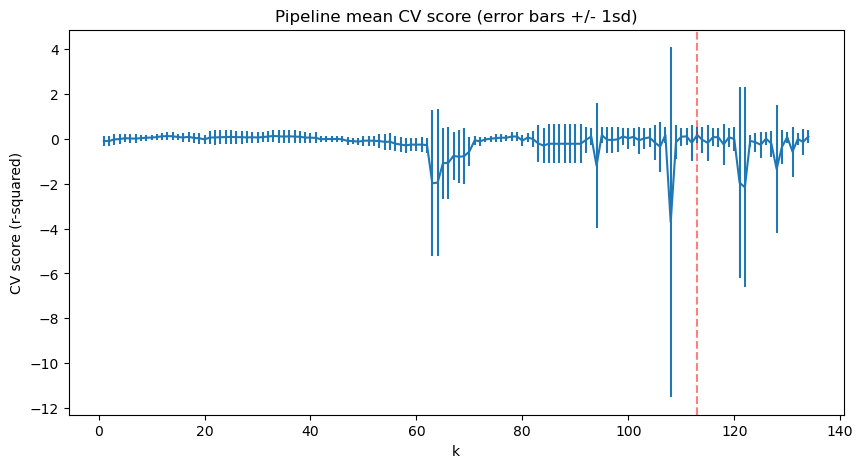

In [88]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [89]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [90]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

Rfrg_Prvdr_Geo_Desc_Massachusetts    0.797839
Rfrg_Prvdr_Geo_Cd_25.0               0.791076
Rfrg_Prvdr_Geo_Cd_10.0               0.625306
Rfrg_Prvdr_Geo_Desc_Delaware         0.601477
Rfrg_Prvdr_Geo_Cd_9.0                0.569826
                                       ...   
Avg_Suplr_Mdcr_Alowd_Amt            -0.581630
Rfrg_Prvdr_Geo_Cd_26.0              -0.705476
Rfrg_Prvdr_Geo_Desc_Michigan        -0.712057
Rfrg_Prvdr_Geo_Desc_Arkansas        -0.753777
Rfrg_Prvdr_Geo_Cd_5.0               -0.792116
Length: 113, dtype: float64

In [91]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [92]:
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [93]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([ 0.20771358,  0.22669567,  0.30272349,  0.01073388, -0.10499691])

In [94]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.12857394208846723, 0.15143357849264055)

In [95]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [96]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [97]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [98]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 12,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [99]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.11100258, 0.26773666, 0.27101184, 0.06525318, 0.03005543])

In [100]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.14901193819157438, 0.10157797625410055)

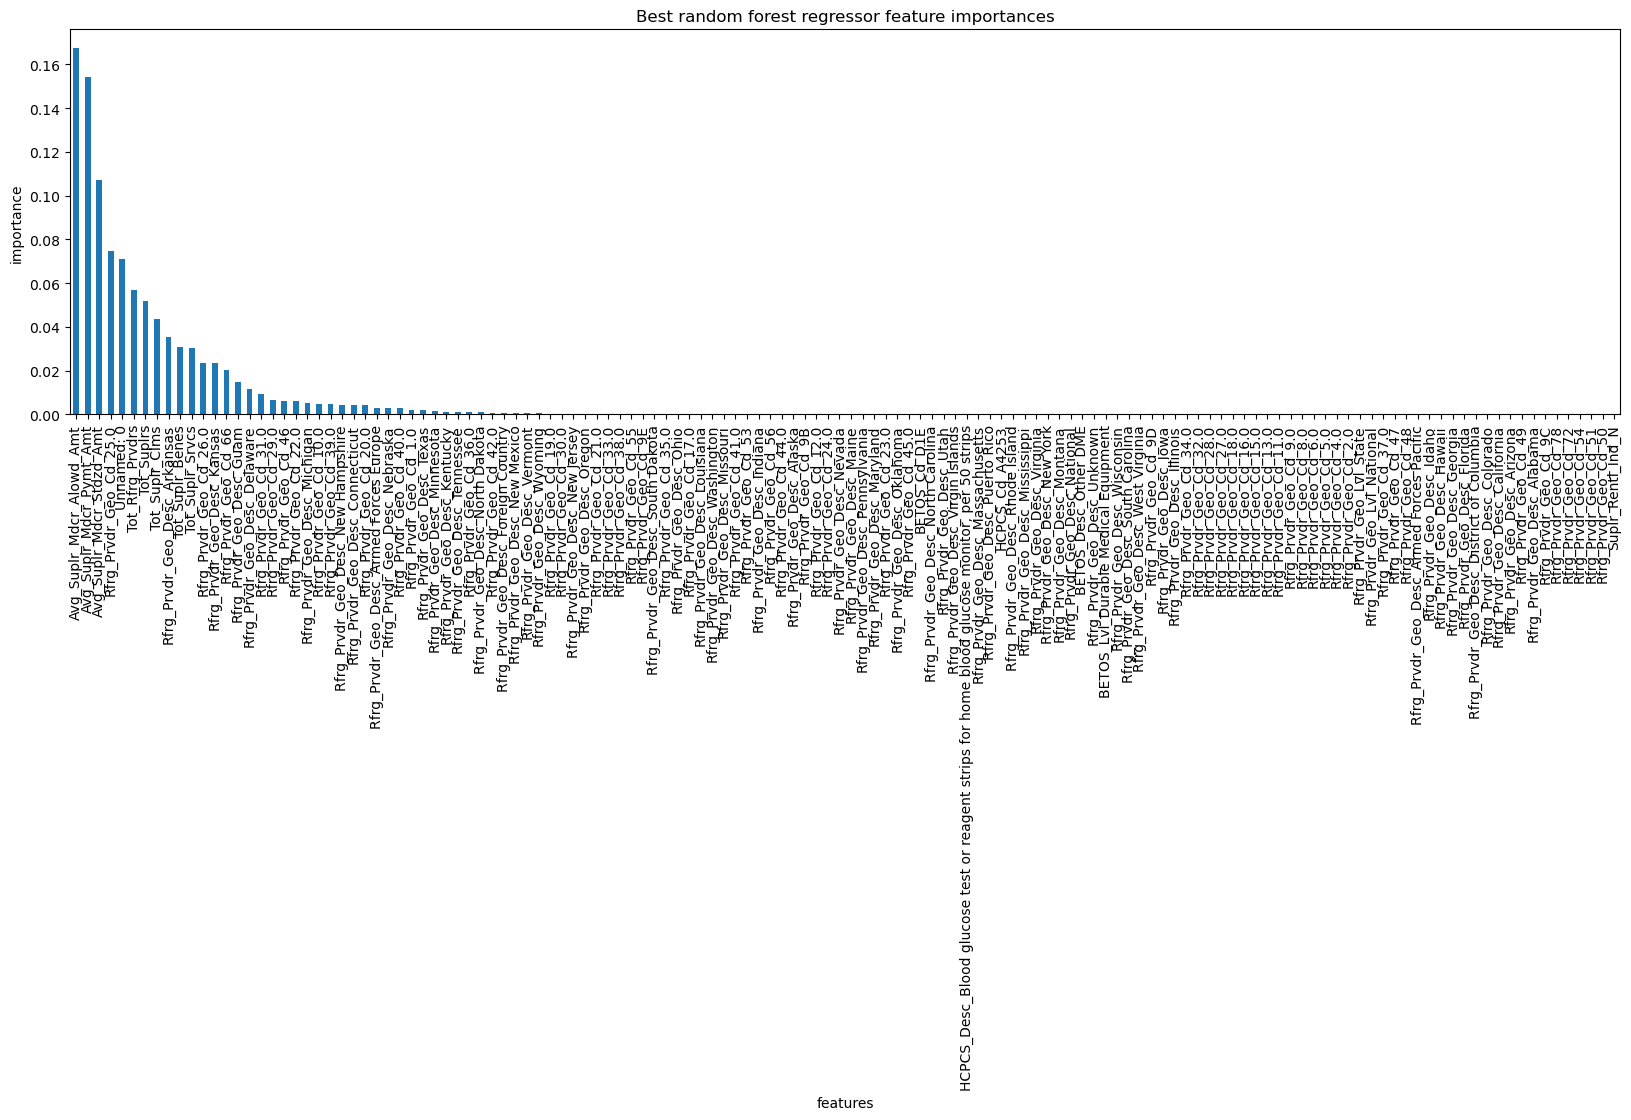

In [101]:
plt.subplots(figsize=(20, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [102]:
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [103]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(3.381689379863611, 1.062210888049772)

In [104]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

5.288759949612167

In [105]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [106]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(3.529295111449817, 1.0294423214214885)

In [107]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

3.95416371248611

In [108]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

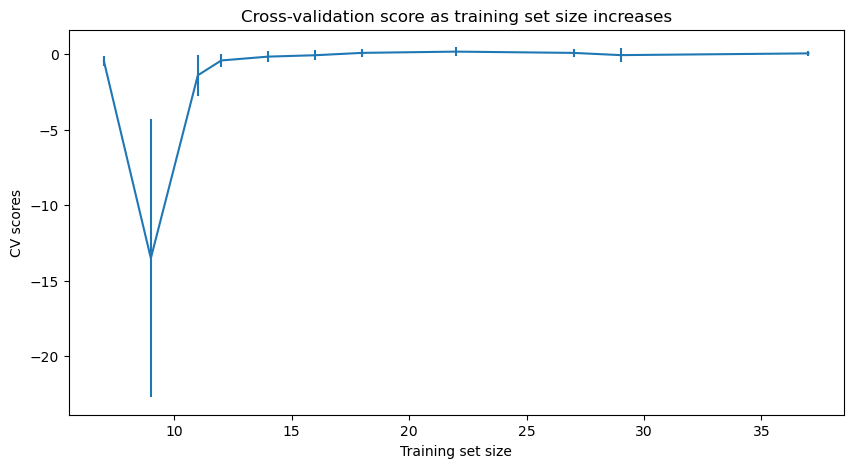

In [109]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

In [110]:
best_model = rf_grid_cv.best_estimator_
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]

In [111]:
joblib.dump(best_model, 'medical_device_model.pkl')

['medical_device_model.pkl']

In [112]:
with open('X_train.pkl', 'wb') as file:
    pickle.dump(X_train, file)
with open('y_train.pkl', 'wb') as file:
    pickle.dump(y_train, file)

In [113]:
with open('X_test.pkl', 'wb') as file:
    pickle.dump(X_test, file)
with open('y_test.pkl', 'wb') as file:
    pickle.dump(y_test, file)